In [1]:
import math
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 60
import numpy as np
import pandas as pd

In [30]:
n = 500
df = pd.DataFrame()

## 下降数据

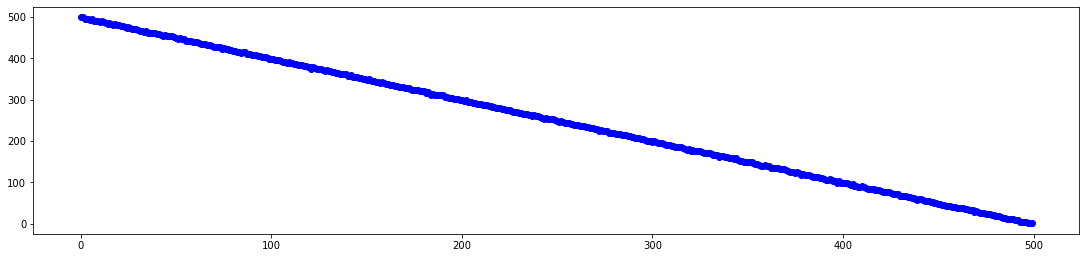

In [31]:
x=np.arange(n)
y_= x[::-1]
mu=0
sigma=1
e= np.random.normal(mu, sigma, n)
y=y_+e
plt.figure(figsize=(15,3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

df["down_trend"] = y

## 常值序列

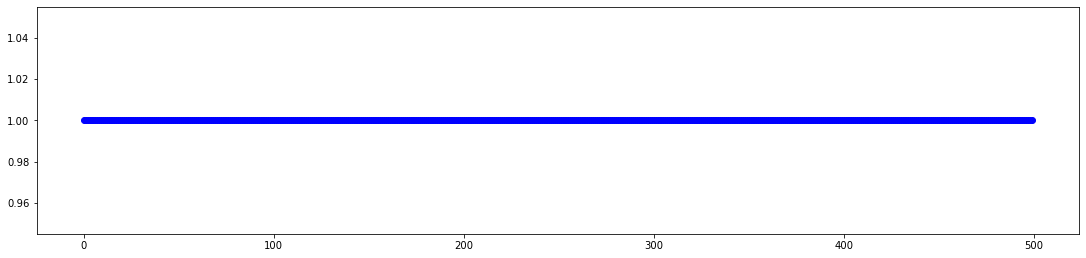

In [32]:
y = np.ones((1,n))[0]

plt.figure(figsize=(15, 3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

df["constant_value"] = y

## 周期性加趋势

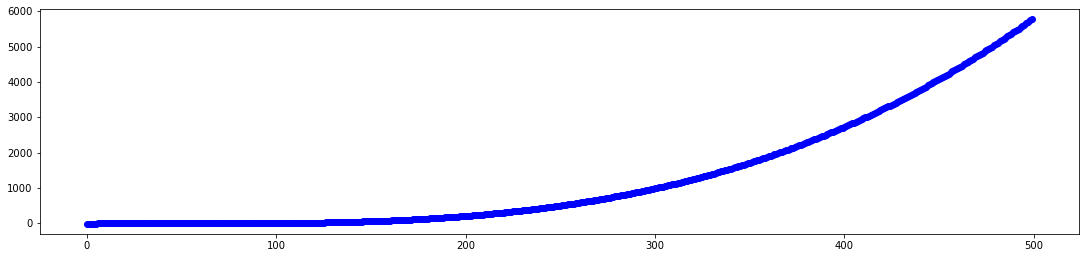

In [33]:
x = np.arange(start=0, step=0.04, stop=0.04*n)
trend = [(a-1)*(a-2)*(a-3) for a in x]
season = np.array([math.sin(i/3*math.pi) for i, _ in enumerate(x)])
noise = np.random.normal(0,0.2,len(x))
y = trend + season + noise
plt.figure(figsize=(15,3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

df["seasonal_trend"] = y

## 白噪音

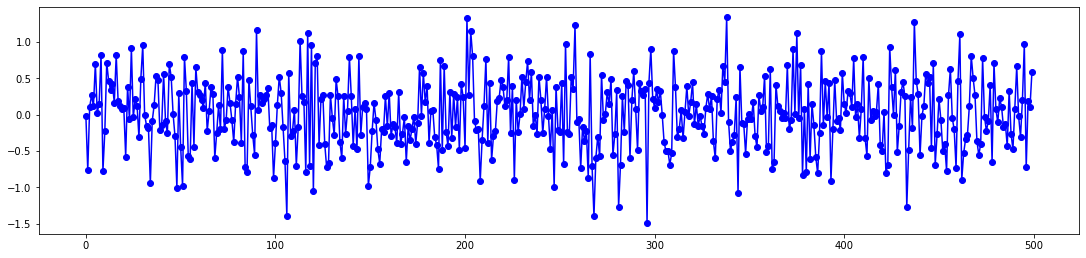

In [34]:
x=np.arange(n)
noise = np.random.normal(0, 0.5, len(x))
y = noise
plt.figure(figsize=(15, 3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

df["white_noise"] = y

## 混入异常

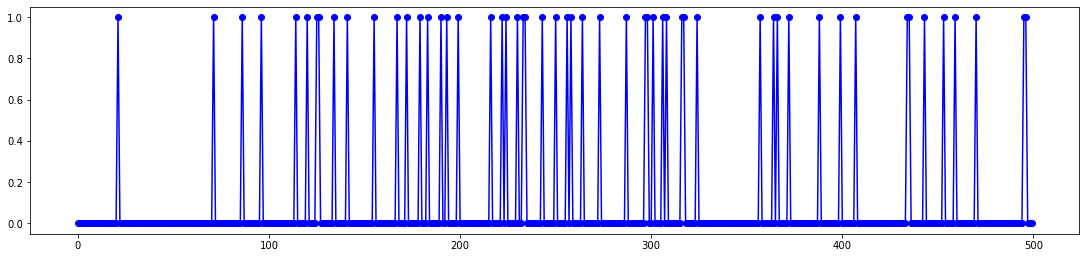

In [47]:
np.random.seed(20)
rr = np.random.random(n) 
y =  rr > 0.9
plt.figure(figsize=(15, 3.5))
plt.plot(y, color="b", marker='o')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

df["outiler"] = rr

## 平稳数据

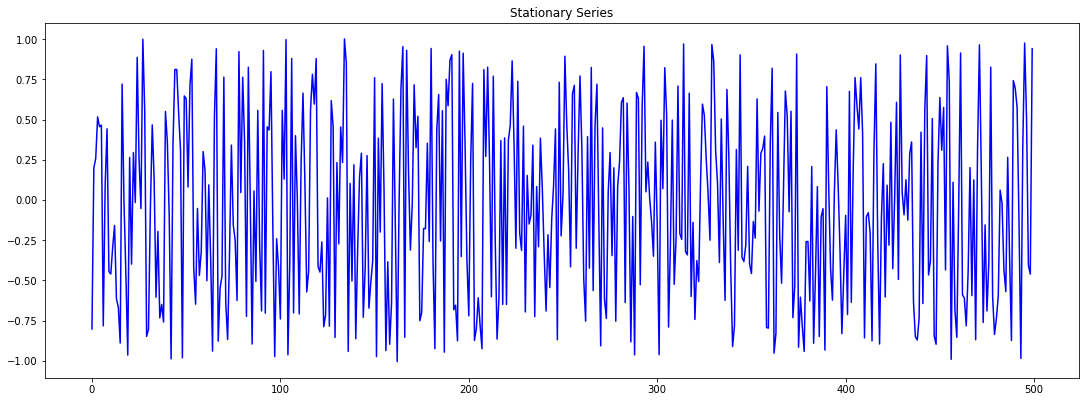

In [36]:
x=np.arange(n)
y_=np.random.uniform(-1,1,[n])

mu=0
sigma=0.01
e= np.random.normal(mu, sigma, n)
#stationary series
y=y_+e

plt.figure(figsize=(15, 5.5))
plt.plot(x,y, color="b", linestyle='-')
plt.title("Stationary Series")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

df["stationary"] = y

## 不平稳数据

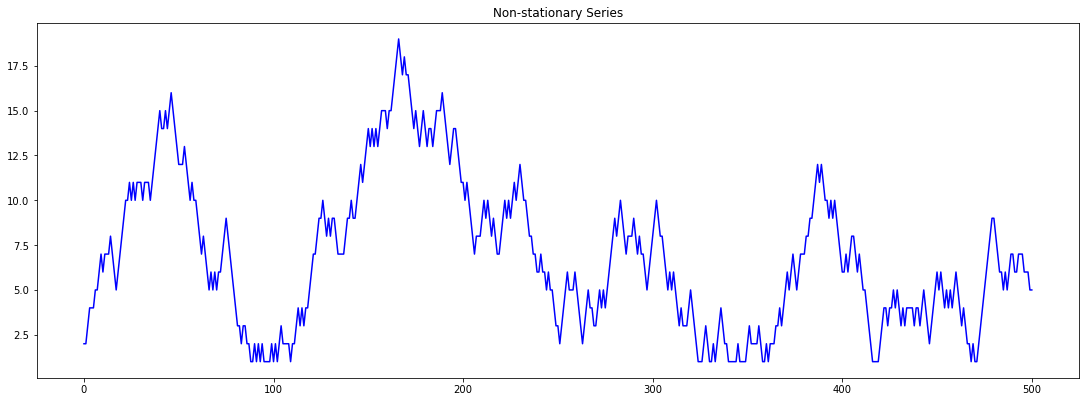

In [37]:
# Probability to move up or down 
prob = [0.4, 0.6]   
  
# statically defining the starting position 
start = 2  
positions = [start] 
  
# creating the random points 
np.random.seed(0)
rr = np.random.random(n) 
downp = rr < prob[0] 
upp = rr > prob[1] 

for idownp, iupp in zip(downp, upp): 
    down = idownp and positions[-1] > 1
    up = iupp and positions[-1] < 100
    positions.append(positions[-1] - down + up) 
  
# plotting down the graph of the random walk in 1D 
plt.figure(figsize=(15, 5.5))
plt.plot(positions, color="b", linestyle='-') 
plt.title("Non-stationary Series")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

df["nonstationary"]=y

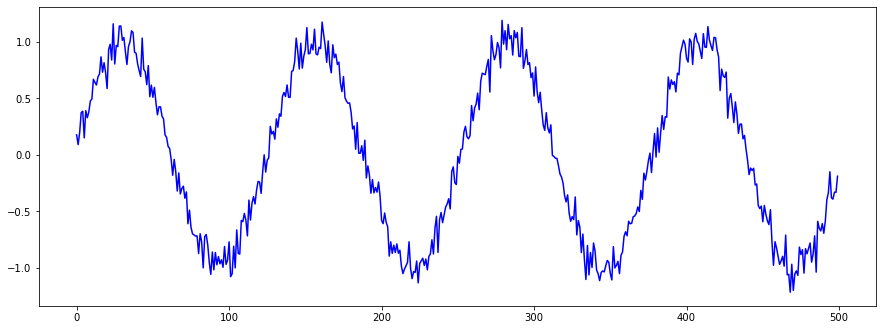

In [38]:
np.random.seed(0)
x = np.arange(start=0,  stop=n)
trend = [math.sin(i/20) for i in x]
noise = np.random.normal(0,0.1,len(x))
y = trend + noise
plt.figure(figsize=(15, 5.5))
plt.plot(y, color="b")
df["seasonal_trend"]=y

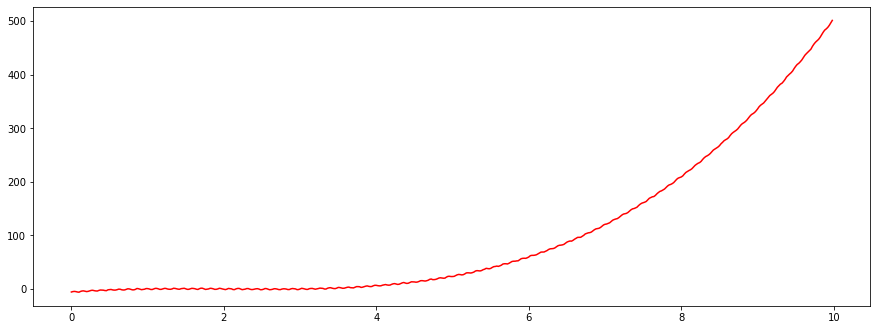

In [41]:
np.random.seed(0)
x = np.arange(start=0, step=0.02, stop=0.02 * n)
trend = [(a-1)*(a-2)*(a-3) for a in x]
season = np.array([math.sin(i/3*math.pi) for i, _ in enumerate(x)])
noise = np.random.normal(0,0.2,len(x))
y = trend + season + noise
plt.figure(figsize=(15,5.5))
pd.Series(data=y, index=x).plot(color='r', linestyle='-')
df["trend_seasonal"] = y

## 变周期

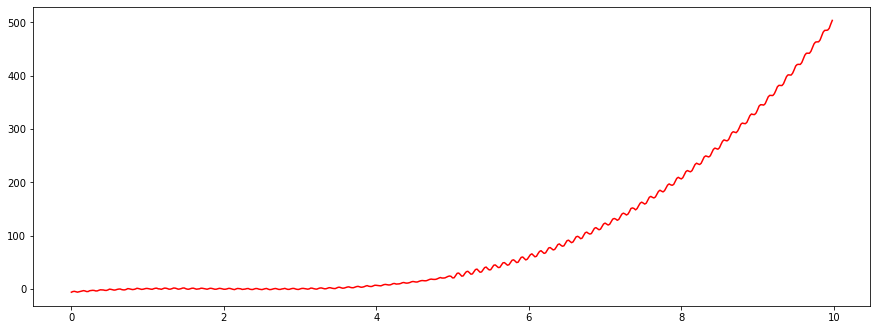

In [45]:
# generate data
x = np.arange(start=0, step=0.02, stop=0.02*n)
trend = [(a-1)*(a-2)*(a-3) for a in x]
season1 = np.array([math.sin(i/3*math.pi) for i, _ in enumerate(x)])
season2 = np.array([4*math.sin(i/3*math.pi) for i, _ in enumerate(x)])
m = math.floor(len(x)/2)
season = np.append(season1[0:m], season2[m:])
noise = np.random.normal(0,0.2,len(x))
y = trend + season + noise
plt.figure(figsize=(15, 5.5))
pd.Series(data=y, index=x).plot(color='r', linestyle='-')
df["changed_seasonal"] = y

In [48]:
df.head()

,down_trend,constant_value,seasonal_trend,white_noise,outiler,stationary,nonstationary,trend_seasonal,changed_seasonal
0,498.931758,1.0,0.176405,-0.016660,0.588131,-0.802693,-0.802693,-5.647190,-6.292347
1,499.713343,1.0,0.089995,-0.765402,0.897714,0.199399,0.199399,-4.836335,-5.053055
2,496.255245,1.0,0.197707,0.103345,0.891531,0.259697,0.259697,-4.507763,-4.630002
3,495.173561,1.0,0.373527,0.265521,0.815837,0.517434,0.517434,-4.913205,-5.323322
4,494.901547,1.0,0.385425,0.119573,0.035890,0.455526,0.455526,-5.650402,-6.194259


## 周期性检测

In [77]:
from scipy.fftpack import fft, fftfreq
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def seasonal_check(ts):
    fft_series = fft(ts)
    power = np.abs(fft_series)
    sample_freq = fftfreq(fft_series.size)

    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    powers = power[pos_mask]

    top_k_seasons = 3
    # top K=3 index
    top_k_idxs = np.argpartition(powers, -top_k_seasons)[-top_k_seasons:]
    top_k_power = powers[top_k_idxs]
    fft_periods = (1 / freqs[top_k_idxs]).astype(int)
    
    acf_scores = []
    for lag in fft_periods:
        acf_score = acf(ts, nlags=lag)[-1]
        acf_scores.append(acf_score)
        
    p = np.argsort(acf_scores)[-1]
    if p is not None and acf_scores[p]>0.5:
       
        return fft_periods[p], acf_scores[p]
    else:
        return 0, 0
    
def stationary_check(ts):
    result = adfuller(ts)
    p_value = result[1]
    return 1 if p_value < 0.5 else 0
    
for c in df.columns:
    p, a = seasonal_check(df[c].values)
    s = stationary_check(df[c])
    print("-"*30)
    print(c, p, a)
    print("stationary" if s ==1 else "non-stationary")
    
    period, acf_s = seasonal_check(df[c].diff(1)[1:].values)
    s = stationary_check(df[c])
    print("-"*30)
    print(c + "_diff", period, acf_s)
    print("stationary" if s ==1 else "non-stationary")
    
    

------------------------------
down_trend 0 0
non-stationary
------------------------------
down_trend_diff 0 0
non-stationary
------------------------------
constant_value 0 0
non-stationary
------------------------------
constant_value_diff 0 0
non-stationary
------------------------------
seasonal_trend 125 0.7394741467776554
stationary
------------------------------
seasonal_trend_diff 0 0
stationary
------------------------------
white_noise 0 0
stationary
------------------------------
white_noise_diff 0 0
stationary
------------------------------
outiler 0 0
stationary
------------------------------
outiler_diff 0 0
stationary
------------------------------
stationary 0 0
stationary
------------------------------
stationary_diff 0 0
stationary
------------------------------
nonstationary 0 0
stationary
------------------------------
nonstationary_diff 0 0
stationary
------------------------------
trend_seasonal 0 0
stationary
------------------------------
trend_seasonal_diff 6 

/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:677: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/Users/renzhiqiang/miniforge3/envs/aiops/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [83]:
from scipy.stats import norm
import numpy as np


def mk_trend_check(x, alpha=0.1):
    """
    对时序数据进行趋势检测，使用MK（Mann-Kendall）检验
    :param x: 时序数据
    :param alpha: 置信度
    :return: 0：没有趋势，1: 趋势增长，-1: 趋势下降
    """
    n = len(x)

    s = 0
    for j in range(n - 1):
        for i in range(j + 1, n):
            s += np.sign(x[i] - x[j])

    unique_x, tp = np.unique(x, return_counts=True)
    g = len(unique_x)

    if n == g:
        var_s = (n * (n - 1) * (2 * n + 5)) / 18
    else:
        var_s = (n * (n - 1) * (2 * n + 5) - np.sum(tp * (tp - 1) * (2 * tp + 5))) / 18

    if n <= 10:
        z = s / (n * (n - 1) / 2)
    else:
        if s > 0:
            z = (s - 1) / np.sqrt(var_s)
        elif s < 0:
            z = (s + 1) / np.sqrt(var_s)
        else:
            z = 0

    p = 2 * (1 - norm.cdf(abs(z)))

    h = abs(z) > norm.ppf(1 - alpha / 2)

    if (z < 0) and h:
        return -1, p
    elif (z > 0) and h:
        return 1, p
    else:
        return 0, p

In [84]:
for c in df.columns:
    t = mk_trend_check(df[c].values)
    print(c, t)

down_trend (-1, 0.0)
constant_value (0, 1.0)
seasonal_trend (-1, 1.065698236257795e-05)
white_noise (0, 0.5767803176069342)
outiler (0, 0.11423631595369432)
stationary (0, 0.5453695231339599)
nonstationary (0, 0.5453695231339599)
trend_seasonal (1, 0.0)
changed_seasonal (1, 0.0)
